# STARTUP FUNDING ANALYSIS
##  obective
####  ● How does the funding ecosystem change with time?
####  ● Do cities play a major role in funding?
####  ● Which industries are favored by investors for funding?
####  ● Who are the important investors in the Indian Ecosystem?
####  ● How much funds do startups generally get in India?

# Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
#Reading csv file using pandas

df= pd.read_csv("startup__funding.csv")

In [3]:
pd.options.display.max_columns = None #to show all the columns in dataset

In [4]:
df.head(5)

,SNo,Date,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks
0,0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.00,NaN
1,1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.00,NaN
2,2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.00,NaN
3,3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.00,NaN
4,4,04-09-2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.00,NaN


# 1. Understanding the data

In [5]:
df.shape

(2999, 10)

In [6]:
df['AmountinUSD']= df['AmountinUSD'].str[:-3]

In [7]:
df['AmountinUSD'] = df['AmountinUSD'].str.replace('[\$\,\.]','')

In [8]:
df.head()

,SNo,Date,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks
0,0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,NaN
1,1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000,NaN
2,2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,NaN
3,3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000,NaN
4,4,04-09-2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000,NaN


In [9]:
#data types in dataset
df.dtypes 

SNo                  int64
Date                object
Startup Name        object
IndustryVertical    object
SubVertical         object
CityLocation        object
Investorname        object
InvestmentnType     object
AmountinUSD         object
Remarks             object
dtype: object

In [10]:
df.describe()

,SNo
count,2999.000000
mean,1523.117039
std,883.753590
min,0.000000
25%,753.000000
50%,1525.000000
75%,2283.500000
max,3057.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
SNo                 2999 non-null int64
Date                2999 non-null object
Startup Name        2999 non-null object
IndustryVertical    2828 non-null object
SubVertical         2073 non-null object
CityLocation        2819 non-null object
Investorname        2976 non-null object
InvestmentnType     2999 non-null object
AmountinUSD         2033 non-null object
Remarks             415 non-null object
dtypes: int64(1), object(9)
memory usage: 234.4+ KB


In [12]:
df.nunique()

SNo                 2999
Date                1001
Startup Name        2429
IndustryVertical     801
SubVertical         1912
CityLocation         104
Investorname        2375
InvestmentnType       50
AmountinUSD          447
Remarks               69
dtype: int64

In [13]:
#Keeping a copy of the original data
df_original= df.copy()
df_original.head()

,SNo,Date,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks
0,0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,NaN
1,1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000,NaN
2,2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,NaN
3,3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000,NaN
4,4,04-09-2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000,NaN


# 2. Handling The Missing Values

In [14]:
# Find Duplicate Rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 10)


In [15]:
# Remove Duplicate Rows
df = df.drop_duplicates()
df.shape

(2999, 10)

In [16]:
df.isna().sum()

SNo                    0
Date                   0
Startup Name           0
IndustryVertical     171
SubVertical          926
CityLocation         180
Investorname          23
InvestmentnType        0
AmountinUSD          966
Remarks             2584
dtype: int64

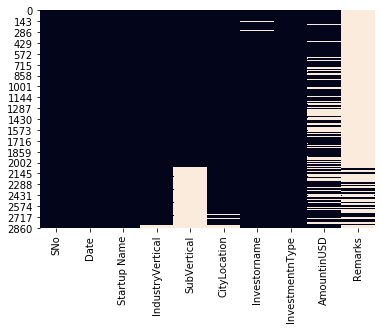

In [17]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

In [18]:
#Dropping this Columns as ChgOffDate had only 70% of NaN Values and Name is not very important as it is just id 
df.drop([ 'SNo','Remarks'], axis = 1, inplace=True)

In [19]:
df.shape

(2999, 8)

In [20]:
#First step is to convert object into date time to do this we need to first structure the data
df['Date']=df['Date'].replace({"12/05.2015":"12/05/2015"})
df['Date']=df['Date'].replace({"13/04.2015":"13/04/2015"})
df['Date']=df['Date'].replace({"22/01//2015":"22/01/2015"})
df['Date']=df['Date'].replace({"15/01.2015":"15/01/2015"})

In [21]:
#Converting date column into type date
df['Date']=pd.to_datetime(df['Date'])

In [22]:
#Extracting month from date column
df['month']=df['Date'].dt.month

In [23]:
#Extracting year from date column

df['year']=df['Date'].dt.year

In [24]:
#Extracting year from date column

df['quarter']=df['Date'].dt.quarter

In [25]:
#Extracting days from date column

df['day']=df['Date'].dt.day

In [26]:
# Combining year and month together
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+ (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [27]:
year_month = df['yearmonth'].dropna().value_counts()

In [28]:
#Dropping date column as we have all the information extracted
df.drop('Date',axis=1,inplace=True)

In [29]:
#Calculating percentage of all the date categories for eda
year=df['year'].value_counts()/len(df['year'])*100
month=df['month'].value_counts()/len(df['month'])*100
quarter=df['quarter'].value_counts()/len(df['quarter'])*100
day=df['day'].value_counts()/len(df['day'])*100

#### StartupName

In [30]:
#There are many variables where the data is same but the name is different
#First we will lower all the strings
#Later we will personally rename all the variable names
df['Startup Name']=df['Startup Name'].str.lower()

In [31]:
df['Startup Name']=df['Startup Name'].replace("practo","practo")
df['Startup Name']=df['Startup Name'].replace("couponmachine.in","couponmachine")
df['Startup Name']=df['Startup Name'].replace("olacabs","ola cabs")
df['Startup Name']=df['Startup Name'].replace("ola","ola cabs")
df['Startup Name']=df['Startup Name'].replace("olipkart.com","flipkart")
df['Startup Name']=df['Startup Name'].replace("paytm marketplace","paytm")
df['Startup Name'][df['Startup Name']=='flipkart.com']='flipkart'

df['Startup Name'][df['Startup Name']=='oyo']='oyo rooms'

#### Industry Vertical

In [32]:
df['IndustryVertical']=df['IndustryVertical'].str.lower()

#### Industry Subvertical

In [33]:
df['SubVertical']=df['SubVertical'].str.lower()

#### City Location

In [34]:
df['CityLocation']=df['CityLocation'].str.lower().str[0:2]

#### Investor Name

In [35]:
df['Investorname']=df['Investorname'].str.split(expand=True)[0].str.lower()

#### Investment Type

In [36]:
df['InvestmentnType']=df['InvestmentnType'].str.lower().str[0]

In [37]:
df.head()

,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,month,year,quarter,day,yearmonth
0,fpl technologies,fintech,financial services,pu,matrix,m,4500000,5,2019,2,9,201905
1,cashflo,fintech,invoice discounting platform and sme lending m...,mu,saif,s,3300000,4,2019,2,9,201904
2,digital f5,"advertising, marketing",digital marketing firm,mu,tiw,p,6000000,4,2019,2,9,201904
3,3rdflix,saas,education technology,hy,exfinity,p,5000000,4,2019,2,9,201904
4,75f,iot,building automation system,bu,breakthrough,s,18000000,4,2019,2,9,201904


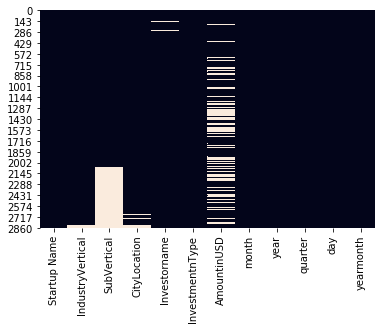

In [38]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

In [39]:
#Imputting na using mode for following columns

df['IndustryVertical'].fillna(df['IndustryVertical'].mode()[0],inplace = True)
df['SubVertical'].fillna(df['SubVertical'].mode()[0],inplace = True)
df['CityLocation'].fillna(df['CityLocation'].mode()[0],inplace = True)
df['Investorname'].fillna(df['Investorname'].mode()[0],inplace = True)
df.shape

(2999, 12)

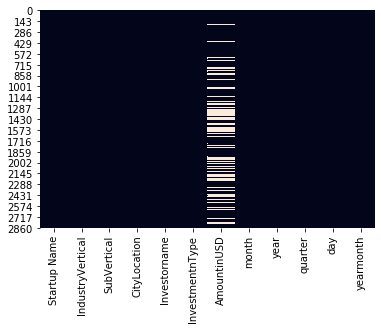

In [40]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

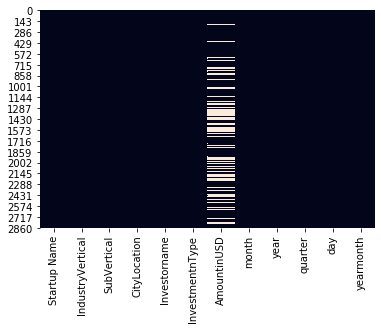

In [41]:
#Now we will create our 2 new dataframes
df_test=df[df['AmountinUSD'].isnull()]

df_test.drop('AmountinUSD',axis=1,inplace=True)

df_test=df_test.dropna()

sns.heatmap(df.isnull(), cbar=False)
plt.show();
#All null values were of year 2015
df_train=(df.dropna(subset=['AmountinUSD']))

In [42]:
df['AmountinUSD'].fillna(df['AmountinUSD'].mode()[0],inplace = True)

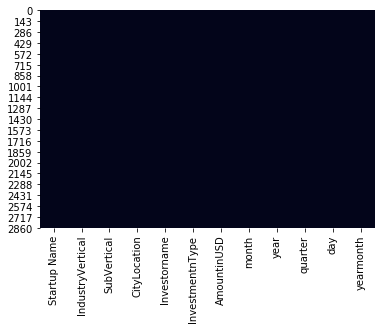

In [43]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

In [44]:
df.isna().sum()

Startup Name        0
IndustryVertical    0
SubVertical         0
CityLocation        0
Investorname        0
InvestmentnType     0
AmountinUSD         0
month               0
year                0
quarter             0
day                 0
yearmonth           0
dtype: int64

In [45]:
corelation = df.corr()
corelation

,month,year,quarter,day,yearmonth
month,1.000000,-0.094415,0.970592,-0.039934,-0.062764
year,-0.094415,1.000000,-0.087223,-0.078592,0.999496
quarter,0.970592,-0.087223,1.000000,-0.036424,-0.056491
day,-0.039934,-0.078592,-0.036424,1.000000,-0.080063
yearmonth,-0.062764,0.999496,-0.056491,-0.080063,1.000000


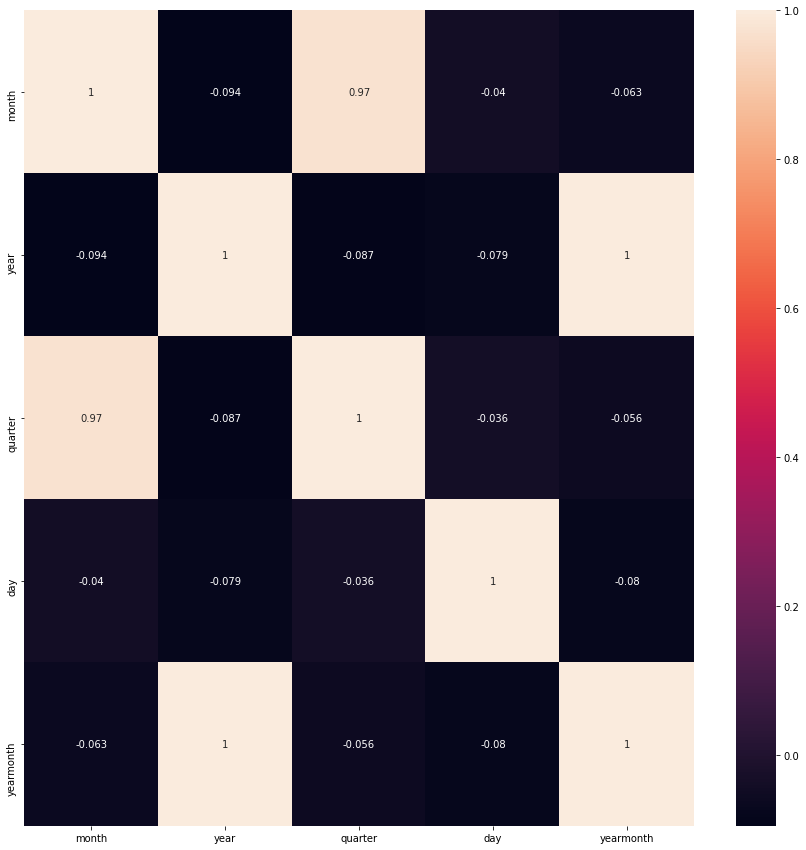

In [46]:
# Heatmap for correlation of numeric coloms
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corelation , xticklabels=corelation.columns , yticklabels=corelation.columns , annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### ● How does the funding ecosystem change with time?

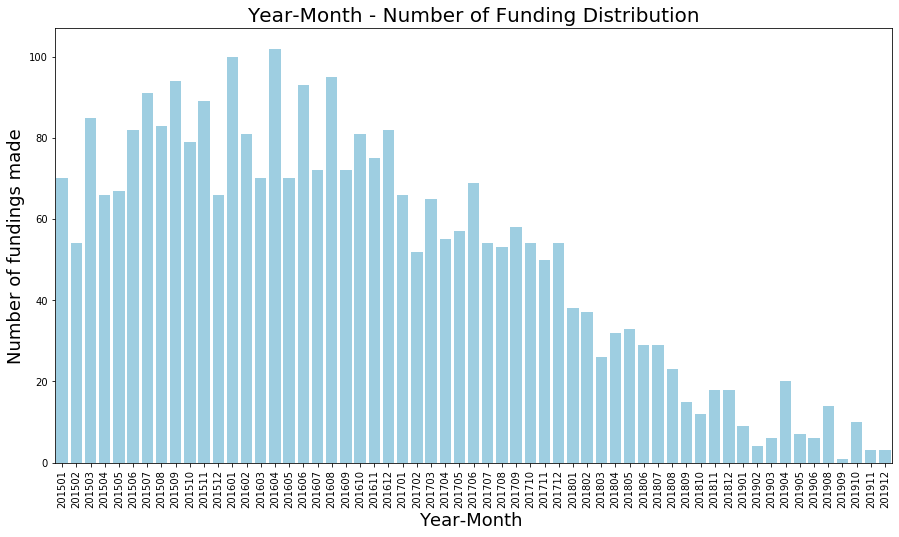

In [47]:
#Plotting funding according to its timeline
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Year-Month ', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Year-Month - Number of Funding Distribution", fontsize=20)
plt.show()
#There seems to be no trend in the amount of funding that has been made
#but from 201612 to 201712 the funding has been gradually dropped

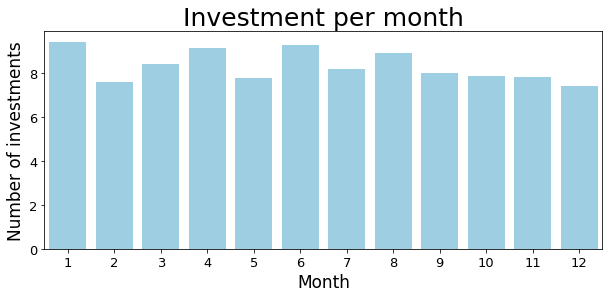

In [48]:
#Checking if there is trend in investment as per month
plt.figure(figsize=(10,4))
sns.barplot(month.index, month.values, alpha=0.9,color='skyblue')
plt.title('Investment per month',fontsize=25)
plt.xlabel('Month',fontsize=17)
plt.ylabel('Number of investments',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
#There does not seem to be any trend but January and June seems to have the most number of investments

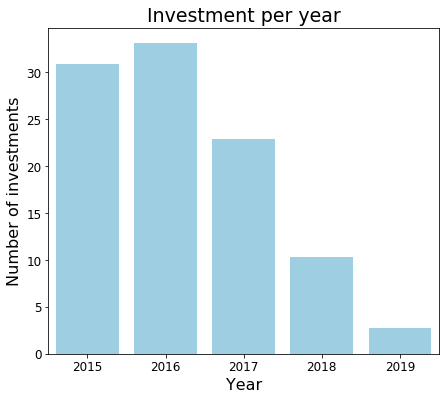

In [49]:
#PLotting funding frequency according to year
plt.figure(figsize=(7,6))
sns.barplot(year.index, year.values, alpha=0.9,color='skyblue')
plt.title('Investment per year',fontsize=19)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of investments',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#It looks like funding has increased from 2015 to 2016. 
#It makes sense if the funding for 2017 will be greater than 2016
#
#But we have data for 2017 till october so we cannot really say if the investment has increased after 2017. 
#According to this data, investment has dropped from 39.6% to 18.6% from 2016 to 2017

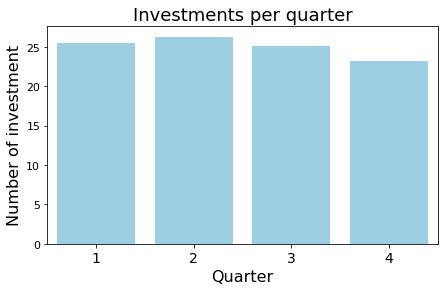

In [50]:
#Plotting funding frequency according to the quarter
plt.figure(figsize=(7,4))
sns.barplot(quarter.index, quarter.values, alpha=0.9,color='skyblue')
plt.title("Investments per quarter",fontsize=18)
plt.xlabel('Quarter',fontsize=16)
plt.ylabel('Number of investment',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=11)
plt.show()
#First 2 quarter seems to have slightly more funding than 3rd and 4th quarter

##  2) AmountInUSD

In [51]:
#Cleaning the target variable
df['AmountinUSD']=(df['AmountinUSD'].str.replace(',','')).astype('float')

In [52]:
#Making a function which gives 95% confidence point and interval, also the range between the lower and upper value.
import scipy.stats as stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    print('Confidence point:-',np.around(m,decimals=2))
    print('From:-',(np.around(m-h,decimals=2)))
    print('To:-',np.around(m+h,decimals=2))
    print('Range:-',(np.around((m+h)-(m-h),decimals=2)))
    

#Calculating 95% confidence interval for out target variable
mean_confidence_interval(df['AmountinUSD'].dropna())

Confidence point:- 11827261.87
From:- 8305457.01
To:- 15349066.73
Range:- 7043609.72


In [53]:
#Printing confidence interval as per year
for x in df['year'].value_counts().index:
    print(x)
    print('*'*30)
    mean_confidence_interval((df['AmountinUSD'][df['year']==x]).dropna())
    print('\n')

2016
******************************
Confidence point:- 4264943.21
From:- 3313438.67
To:- 5216447.75
Range:- 1903009.07


2015
******************************
Confidence point:- 9589835.17
From:- 6700072.61
To:- 12479597.73
Range:- 5779525.13


2017
******************************
Confidence point:- 15517190.29
From:- 6211835.75
To:- 24822544.83
Range:- 18610709.08


2018
******************************
Confidence point:- 16642423.77
From:- 11064259.92
To:- 22220587.62
Range:- 11156327.69


2019
******************************
Confidence point:- 78737605.65
From:- -15002768.48
To:- 172477979.79
Range:- 187480748.27




In [54]:
#Printing confidence interval for top all top3 categories
for cols in df.columns[0:6]:
    print(cols)
    for x in df[cols].value_counts()[0:3].index:
        print('*'*30)        

        print(x)
        
        print('*'*30)
        
        mean_confidence_interval((df['AmountinUSD'][df[cols]==x]).dropna())
        
        print('\n')

Startup Name
******************************
ola cabs
******************************
Confidence point:- 158092307.69
From:- 56375790.46
To:- 259808824.93
Range:- 203433034.47


******************************
swiggy
******************************
Confidence point:- 33812500.0
From:- 3415400.85
To:- 64209599.15
Range:- 60794198.3


******************************
paytm
******************************
Confidence point:- 335850000.0
From:- -153024597.15
To:- 824724597.15
Range:- 977749194.3


IndustryVertical
******************************
consumer internet
******************************
Confidence point:- 7076027.5
From:- 5580497.21
To:- 8571557.8
Range:- 2991060.59


******************************
technology
******************************
Confidence point:- 4980291.87
From:- 3829679.87
To:- 6130903.87
Range:- 2301224.0


******************************
ecommerce
******************************
Confidence point:- 28107405.46
From:- 3737243.82
To:- 52477567.1
Range:- 48740323.28


SubVertical
*

In [55]:
#Statistics for Amount of investment
#The amount that is invested seems to be very flexible
print('skewness',df['AmountinUSD'].skew())
print('kurtosis',df['AmountinUSD'].kurtosis())
print('median  ',df['AmountinUSD'].median())
print(df['AmountinUSD'].describe())

skewness 28.408864234338793
kurtosis 979.1459082945024
median   1000000.0
count    2.999000e+03
mean     1.182726e+07
std      9.836261e+07
min      3.000000e+03
25%      9.705000e+05
50%      1.000000e+06
75%      4.000000e+06
max      3.900000e+09
Name: AmountinUSD, dtype: float64


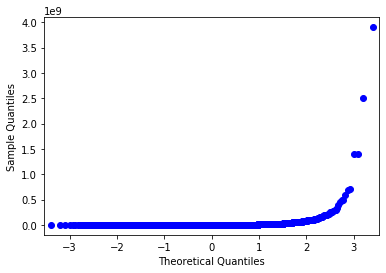

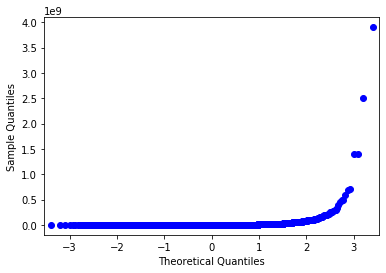

In [56]:
#Checking the distribution for the target variable AmountInUSD
import statsmodels.api as sm
sm.qqplot(df['AmountinUSD'].dropna())

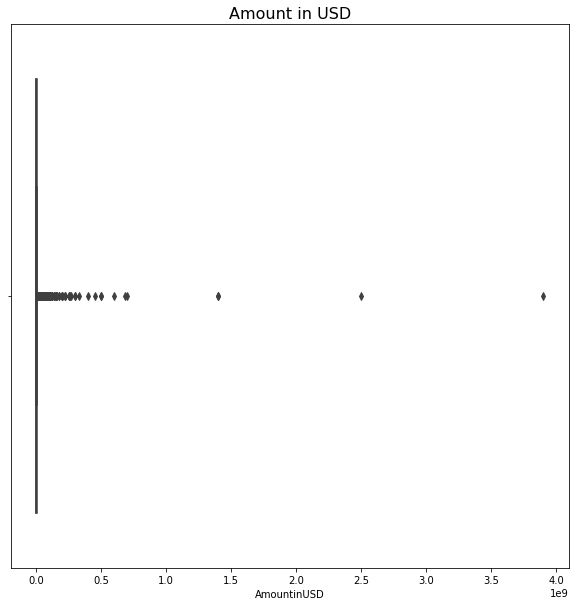

In [57]:
fig = plt.subplots(figsize=(10,10))
sns.boxplot(x="AmountinUSD", data=df)
plt.title("Amount in USD", fontdict={'fontsize': 16});

In [58]:
#Analyzing the startup that got the max funding
df[df['AmountinUSD']==1400000000.0]

,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,month,year,quarter,day,yearmonth
795,paytm,ecommerce,mobile wallet & ecommerce platform,ba,softbank,p,1.400000e+09,5,2017,2,18,201705
931,flipkart,ecommerce,ecommerce marketplace,ba,"microsoft,",p,1.400000e+09,3,2017,1,21,201703


In [59]:
#Analyzing the startup that got the least funding
df[df['AmountinUSD']==16000]

,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,month,year,quarter,day,yearmonth
2972,hostel dunia,consumer internet,online lending platform,ba,hyderabad,s,16000.0,1,2015,1,19,201501
2973,play your sport,consumer internet,online lending platform,ba,hyderabad,s,16000.0,1,2015,1,19,201501
2974,yo grad,consumer internet,online lending platform,ba,hyderabad,s,16000.0,1,2015,1,19,201501
2975,enabli,consumer internet,online lending platform,ba,hyderabad,s,16000.0,1,2015,1,19,201501
2976,cbs,consumer internet,online lending platform,ba,hyderabad,s,16000.0,1,2015,1,19,201501


In [60]:
df['InvestmentnType']=df['InvestmentnType'].str.lower().str[0]

In [61]:
df.head()

,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,month,year,quarter,day,yearmonth
0,fpl technologies,fintech,financial services,pu,matrix,m,4500000.0,5,2019,2,9,201905
1,cashflo,fintech,invoice discounting platform and sme lending m...,mu,saif,s,3300000.0,4,2019,2,9,201904
2,digital f5,"advertising, marketing",digital marketing firm,mu,tiw,p,6000000.0,4,2019,2,9,201904
3,3rdflix,saas,education technology,hy,exfinity,p,5000000.0,4,2019,2,9,201904
4,75f,iot,building automation system,bu,breakthrough,s,18000000.0,4,2019,2,9,201904


In [62]:
#There are many variables where the data is same but the name is different
#First we will lower all the strings
#Later we will personally rename all the variable names
df['Startup Name']=df['Startup Name'].str.lower()

In [63]:
df['Startup Name']=df['Startup Name'].replace("practo","practo")
df['Startup Name']=df['Startup Name'].replace("couponmachine.in","couponmachine")
df['Startup Name']=df['Startup Name'].replace("olacabs","ola cabs")
df['Startup Name']=df['Startup Name'].replace("ola","ola cabs")
df['Startup Name']=df['Startup Name'].replace("olipkart.com","flipkart")
df['Startup Name']=df['Startup Name'].replace("paytm marketplace","paytm")
df['Startup Name'][df['Startup Name']=='flipkart.com']='flipkart'

df['Startup Name'][df['Startup Name']=='oyo']='oyo rooms'

In [64]:
df['IndustryVertical']=df['IndustryVertical'].str.lower()

In [65]:
df['SubVertical']=df['SubVertical'].str.lower()

In [66]:
df['CityLocation']=df['CityLocation'].str.lower().str[0:2]

In [67]:
df['Investorname']=df['Investorname'].str.split(expand=True)[0].str.lower()

# EDA of categorical variables

## 1) Startup Name

In [68]:
#Statistics for categorical variables
df.describe(include='object')

,Startup Name,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType
count,2999,2999,2999,2999,2999,2999
unique,2315,780,1853,51,1195,11
top,ola cabs,consumer internet,online lending platform,ba,undisclosed,s
freq,13,1113,947,887,157,1581


In [69]:
#Top 10 statups according to amount invested
(df[['Startup Name','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(10)

,Startup Name,AmountinUSD
25,rapido bike taxi,3.900000e+09
616,flipkart,2.500000e+09
795,paytm,1.400000e+09
931,flipkart,1.400000e+09
2603,flipkart,7.000000e+08
2424,paytm,6.800000e+08
153,true north,6.000000e+08
2435,snapdeal,5.000000e+08
2209,ola cabs,5.000000e+08
7,goqii,4.500000e+08


In [70]:
#Making a dataframe of top 20 start up name according to the amount that was invested in them

top20funding=(df[['Startup Name','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)

top20funding

,Startup Name,AmountinUSD
25,rapido bike taxi,3.900000e+09
616,flipkart,2.500000e+09
795,paytm,1.400000e+09
931,flipkart,1.400000e+09
2603,flipkart,7.000000e+08
2424,paytm,6.800000e+08
153,true north,6.000000e+08
2435,snapdeal,5.000000e+08
2209,ola cabs,5.000000e+08
7,goqii,4.500000e+08


In [71]:
#Counting the frequency of startups in top 20 startups that were funded
top20fundingcount=(df[['Startup Name','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)['Startup Name'].value_counts()
top20fundingcount

ola cabs               5
flipkart               3
oyo rooms              2
paytm                  2
edelweiss              1
automation anywhere    1
rapido bike taxi       1
true north             1
snapdeal               1
bigbasket              1
zilingo                1
goqii                  1
Name: Startup Name, dtype: int64

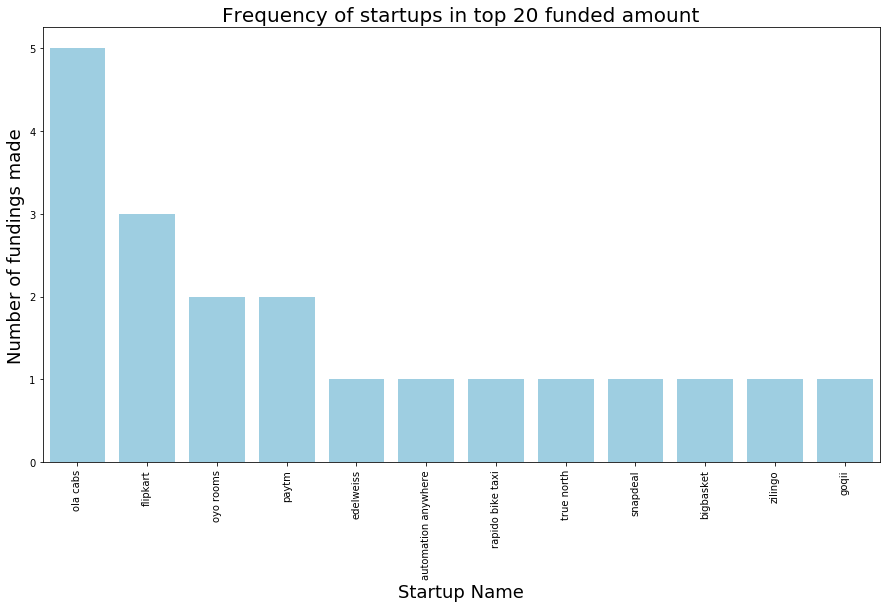

In [72]:
##Plotting the frequency of startups in top 20 startups that were funded

plt.figure(figsize=(15,8))
sns.barplot(top20fundingcount.index, top20fundingcount.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups in top 20 funded amount", fontsize=20)
plt.show()

In [73]:
#Creating a new dataframe with Startup name and the amount they got as funding
nameamount=df_train[['Startup Name','AmountinUSD']]

In [74]:
#Grouping the dataframe according to startup name and sorting it out accoring to number of funding they recieved
nameamount=nameamount.groupby('Startup Name').sum().sort_values(by='AmountinUSD',ascending=False)
nameamount


,AmountinUSD
Startup Name,
myloancare,978000
ad2pro,9700000
betterplace,970000
shopsup,963000
wizrocket,9600000
...,...
serv\\xe2\\x80\\x99d,100000
aisle.co,100000
mychild app,100000


In [75]:


np.sum((nameamount/np.sum(nameamount)*100).head(53))

len(nameamount)

53/1604*100




TypeError: unsupported operand type(s) for /: 'str' and 'float'

# 2) Industry Vertical

In [ ]:
#Percentage of null values in dataframe
len(df[df['IndustryVertical'].isnull()==True])/len(df['IndustryVertical'])*100

In [ ]:
#Industries that recieved funding more than 3 times
df_train['IndustryVertical'].value_counts()[df_train['IndustryVertical'].value_counts()>3]

In [ ]:
#Top 3 industries with most frequent funding recieved
(df_train['IndustryVertical'].value_counts()/len(df_train['IndustryVertical'])*100)[0:3]

x_barindustry=np.array(['consumer internet','technology','ecommerce','other 2369'])     
y_barindustry=np.array([30.229508,12.393443,9.770492,47.6])

plt.figure(figsize=(10,8))
sns.barplot(x_barindustry,y_barindustry,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of fundding according to industry", fontsize=20)

plt.show()

#Comparing investments of top 3 industries vs the rest
x_barindustry_top3=np.array(['top3','other 2369'])     
y_barindustry_top3=np.array([53.4,47.6])


plt.figure(figsize=(8,6))
sns.barplot(x_barindustry_top3,y_barindustry_top3,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of funding according to industry", fontsize=20)

plt.show()

In [ ]:
#Creating new dataframe with the industry name and amount invested in respective industries
indamount=df_train[['IndustryVertical','AmountinUSD']]

#Grouping the dataframe according to industries and sorting it according to the amount invested
indamount=indamount.groupby('IndustryVertical').sum().sort_values(by='AmountinUSD',ascending=False)

#How much investment is done in how many of industries?
np.sum((indamount/indamount.sum()*100).head(9))

len(indamount)

9/508*100

In [ ]:
indamount.sum()

In [ ]:
plot_gross1 = pd.DataFrame(df.groupby(['CityLocation'])['AmountinUSD'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross1 = plot_gross1[plot_gross1['AmountinUSD'] > 0]  
plot_gross1.head(10)
plt.subplots(figsize=(10,7))
sns.barplot(x='CityLocation',y='AmountinUSD',data=plot_gross1,palette='rainbow', )
plt.ylabel('Amount In USDl($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('CityLocation', fontsize=20)
plt.title('CityLocation with highest Amount In USD', fontsize=20)
plt.show()

In [84]:
pip install cartoframes


Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Mandar\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mandar\\AppData\\Local\\Temp\\pip-install-tehuujc7\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mandar\\AppData\\Local\\Temp\\pip-install-tehuujc7\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\Mandar\AppData\Local\Temp\pip-install-tehuujc7\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
